# Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

# Exploring the Data (EDA)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.Outcome.unique()

array([1, 0], dtype=int64)

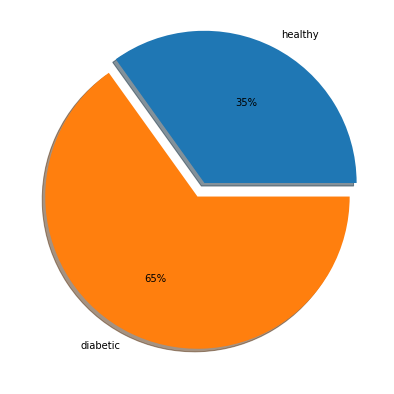

In [7]:
healthy = (df.Outcome == 1).sum()
diabetic = (df.Outcome == 0).sum()

fig = plt.figure(figsize = (10,7))
plt.pie([healthy, diabetic], labels = ['healthy', 'diabetic'], autopct='%.0f%%', explode = (0.1, 0), shadow = True)
plt.show()

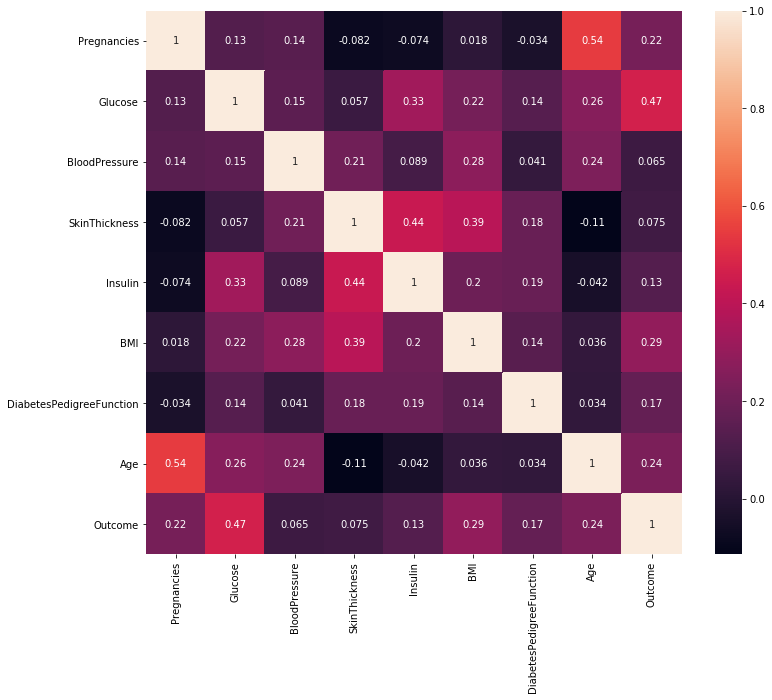

In [8]:
#df.corr for correlation between features
fig,ax =plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()
#This heatmap tells the corelation between any two attributes in the dataset.

# Handling Missing Values

In [9]:
#Since min of a lot of features is 0
#Search for 0 values in df
for i in df:
    print(f'0 values in {i} : {len((df.loc[df[i] == 0]))}')

0 values in Pregnancies : 111
0 values in Glucose : 5
0 values in BloodPressure : 35
0 values in SkinThickness : 227
0 values in Insulin : 374
0 values in BMI : 11
0 values in DiabetesPedigreeFunction : 0
0 values in Age : 0
0 values in Outcome : 500


In [10]:
from sklearn.impute import SimpleImputer 

fill_values = SimpleImputer (missing_values = 0, strategy = 'mean')

#replace 0 with mean in Glucose, BloodPressure, SkinThickness, Insulin, BMI 
clean_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[clean_cols] = fill_values.fit_transform(df[clean_cols])

In [11]:
#Since min of a lot of features is 0
#Search for 0 values in df
for i in df:
    print(f'0 values in {i} : {len((df.loc[df[i] == 0]))}')

0 values in Pregnancies : 111
0 values in Glucose : 0
0 values in BloodPressure : 0
0 values in SkinThickness : 0
0 values in Insulin : 0
0 values in BMI : 0
0 values in DiabetesPedigreeFunction : 0
0 values in Age : 0
0 values in Outcome : 500


In [12]:
# separating the features and target 
X = df.drop(['Outcome'],axis=1)
y = df[['Outcome']]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3, random_state = 1)

In [14]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Accuracy and Metrics
from sklearn.metrics import accuracy_score

diabetes_model = RandomForestClassifier(random_state = 1)
diabetes_model.fit(X_train, y_train.values.reshape(-1,)) #1dim array is expected in y so .reshape(-1,)
y_predict = diabetes_model.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_predict)}')

Accuracy Score: 0.7705627705627706


In [15]:
diabetes_model.predict([[0, 137, 40, 35, 168, 43.1, 2.288, 33]])

array([1], dtype=int64)

# Make Prediction On User Input Data 

In [16]:
#Make prediction on user input data
import ipywidgets as widgets

preg = widgets.IntText(description='Pregnancies:')
gluc = widgets.FloatText(description='Glucose:')
bp = widgets.FloatText(description='Blood Pressure:')
skin = widgets.FloatText(description='Skin Thickness:')
insulin = widgets.FloatText(description='Insulin:')
bmi = widgets.FloatText(description='BMI:')
dpf = widgets.FloatText(description='Daiabetes Pedigree Function:')
age = widgets.IntText(description='Age:')

vars = [preg, gluc, bp, skin, insulin, bmi, dpf, age]

for i in vars:
    display(i)
    
button = widgets.Button(description="Get Result!")
display(button)

result_label = widgets.Label()
display(result_label)
    
#print(result)
def get_res(b):
    result = diabetes_model.predict([[preg.value, gluc.value, bp.value, skin.value, insulin.value, bmi.value, dpf.value, age.value]])
    if result == 1:
        result_label.value = 'Diabetes'
    else:
         result_label.value = 'No Diabetes'

button.on_click(get_res)

IntText(value=0, description='Pregnancies:')

FloatText(value=0.0, description='Glucose:')

FloatText(value=0.0, description='Blood Pressure:')

FloatText(value=0.0, description='Skin Thickness:')

FloatText(value=0.0, description='Insulin:')

FloatText(value=0.0, description='BMI:')

FloatText(value=0.0, description='Daiabetes Pedigree Function:')

IntText(value=0, description='Age:')

Button(description='Get Result!', style=ButtonStyle())

Label(value='')